In [1]:
# preambles 
import cv2
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib
import matplotlib.pyplot as plt

from basic.utils.general import get_original_callable
from basic.utils.convert import tensor2numpy
from basic.utils.console.logplot import get_root_plotter, Plotter, AccumulatedPlotter
plotter: Plotter = get_root_plotter()
accumulated_plotter: AccumulatedPlotter = get_root_plotter(plotter_class=AccumulatedPlotter.__name__)

plt.close('all')
matplotlib.use('TkAgg')

def plt_save(*args, **kwargs):
    plt.show()

def plt_close(*args, **kwargs):
    pass


matplotlib.pyplot.savefig = plt_save
true_plt_close = matplotlib.pyplot.close
matplotlib.pyplot.close = plt_close

# from unittest import mock
# mock.patch("matplotlib.pyplot.savefig", plt_save)
# mock.patch("matplotlib.pyplot.close", plt_close)

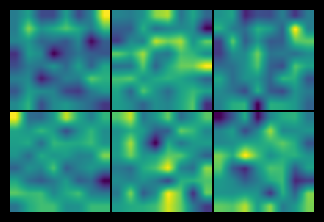

In [2]:
%matplotlib inline
# ============================================================
# plotter.heatmap
# ============================================================
true_plt_close('all')

# heat map examples
def create_heat_map_example():
    x = torch.randn(2, 3, 8, 8)
    x = F.interpolate(x, size=(64, 64), mode='bilinear', align_corners=False)
    return x
x = create_heat_map_example()

# display heat map
heatmap = get_original_callable(plotter.heatmap)    # for matplotlib
heatmap(x, figname="heatmap+")

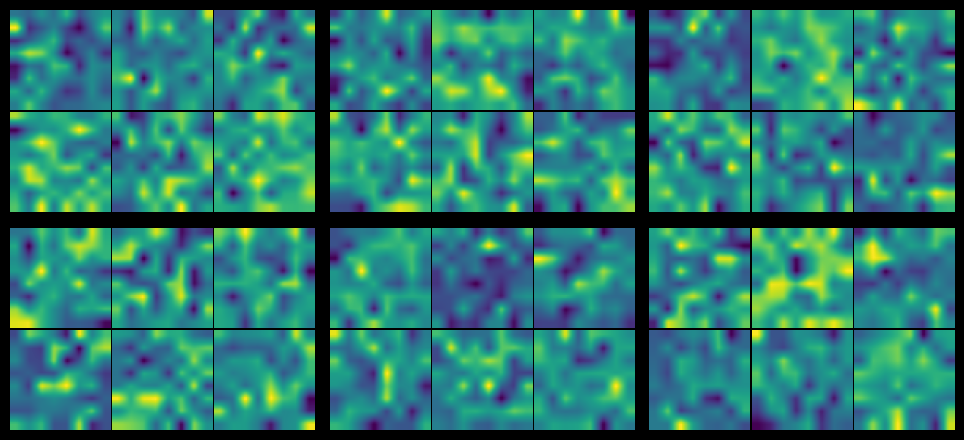

In [3]:
%matplotlib inline
# ============================================================
# plotter.grid_wrapper
# ============================================================
true_plt_close('all')


# grid heat map examples
def create_heat_map_example():
    x = torch.randn(2, 3, 8, 8)
    x = F.interpolate(x, size=(64, 64), mode='bilinear', align_corners=False)
    return x

nrows, ncols = 2, 3
data_list = [create_heat_map_example() for _ in range(nrows * ncols)]

grid_wrapper = get_original_callable(plotter.grid_wrapper)
grid_wrapper(data_list, plotter.heatmap, figname="heatmap+", nrows=nrows, ncols=ncols) # , cmap="magma", normalize=True

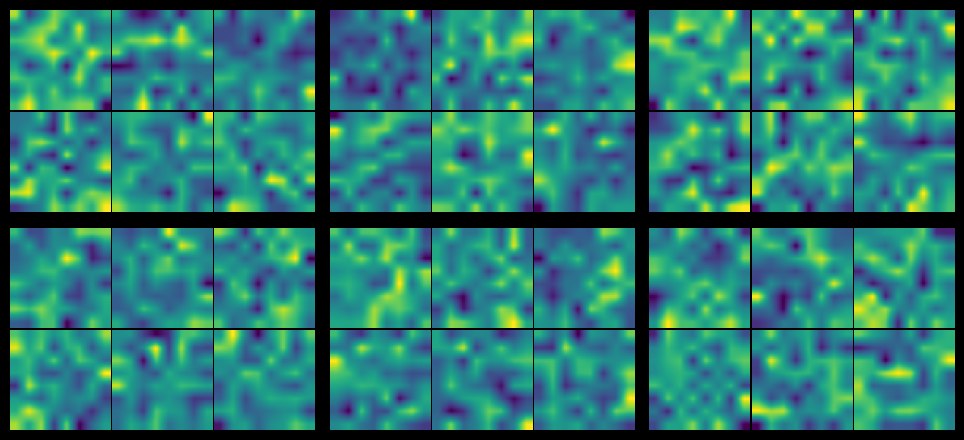

In [4]:
%matplotlib inline
# ============================================================
# accumulated_plotter.accumulate + plotter.grid_wrapper
# ============================================================
true_plt_close('all')


# grid heat map examples
def create_heat_map_example():
    x = torch.randn(2, 3, 8, 8)
    x = F.interpolate(x, size=(64, 64), mode='bilinear', align_corners=False)
    return x


key = 'heat_map'

accumulate = get_original_callable(accumulated_plotter.accumulate)
nrows, ncols = 2, 3
for i in range(nrows):
    for j in range(ncols):
        x = create_heat_map_example()
        accumulate(key, x)

accumulated_operate = get_original_callable(accumulated_plotter.accumulated_operate)
grid_wrapper = get_original_callable(plotter.grid_wrapper)
accumulated_operate(key, grid_wrapper, plotter.heatmap, figname="heatmap+", nrows=nrows, ncols=ncols)